In [9]:
import numpy as np
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
import matplotlib.pyplot as plt
import pandas as pd


In [10]:
def plot_images(images, title, n_rows=10, n_cols=10):
    plt.figure(figsize=(n_cols * 1.5, n_rows * 1.5))
    plt.suptitle(title, fontsize=16)
    for i, image in enumerate(images[:n_rows * n_cols]):
        plt.subplot(n_rows, n_cols, i + 1)
        plt.imshow(image.reshape(28, 28), cmap='gray')
        plt.axis('off')
    plt.tight_layout()
    plt.show()

def plot_latent_space(compressed_data, labels):
    plt.figure(figsize=(8, 8))
    plt.scatter(compressed_data[:, 0], compressed_data[:, 1], c=labels, cmap='viridis', s=2)
    plt.colorbar()
    plt.xlabel('Latent Dimension 1')
    plt.ylabel('Latent Dimension 2')
    plt.title('Latent Space Visualization')
    plt.show()

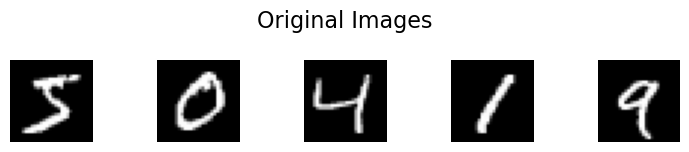

In [11]:
def load_mnist_data():
    (X_train, _), (_, _) = mnist.load_data()
    X_train = X_train.reshape(X_train.shape[0], -1) / 255.0
    return X_train

data = load_mnist_data()
plot_images(data, title='Original Images', n_rows=1, n_cols=5)


In [12]:
def create_autoencoder(input_dim, encoding_dim, activation_func, loss_func):
    # Encoder model
    encoder = Sequential([
        Dense(128, activation=activation_func, input_shape=(input_dim,)),
        Dense(64, activation=activation_func),
        Dense(encoding_dim, activation=activation_func)
    ])
    
    # Decoder model
    decoder = Sequential([
        Dense(64, activation=activation_func, input_shape=(encoding_dim,)),
        Dense(128, activation=activation_func),
        Dense(input_dim, activation='sigmoid')
    ])

    autoencoder = Sequential([encoder, decoder], name='autoencoder')

    autoencoder.compile(optimizer='adam', loss=loss_func)

    return autoencoder, encoder, decoder

def train_autoencoder(data, encoding_dim, epochs=100, batch_size=256):
    input_dim = data.shape[1]
    autoencoder, encoder, decoder = create_autoencoder(input_dim, encoding_dim, activation_func='relu', loss_func='binary_crossentropy')
    autoencoder.fit(data, data, epochs=epochs, batch_size=batch_size, shuffle=True)
    return encoder, decoder, autoencoder

In [13]:
encoder, decoder, autoencoder = train_autoencoder(data, encoding_dim=2)

Epoch 1/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - loss: 0.3571
Epoch 2/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.2245
Epoch 3/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - loss: 0.2131
Epoch 4/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - loss: 0.2064
Epoch 5/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - loss: 0.2011
Epoch 6/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - loss: 0.1973
Epoch 7/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 0.1942
Epoch 8/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 0.1922
Epoch 9/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 0.1899
Epoch 10/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 0.1883
Epoch 11/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 0.1867
Epoch 12/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 0.1861
Epoch 13/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 0.1855
Epoch 14/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 0.1848
Epoch 15/100
235/235 ━━━━━━━━

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step


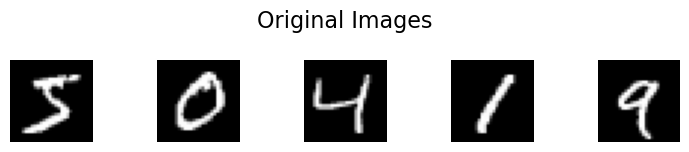

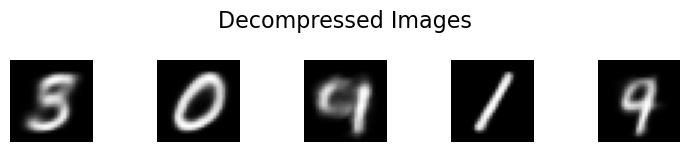

In [14]:
def compress(data, encoder):
    return encoder.predict(data)

def decompress(compressed_data, decoder):
    return decoder.predict(compressed_data)

compressed_data = compress(data, encoder)
decompressed_data = decompress(compressed_data, decoder)

plot_images(data, title='Original Images', n_rows=1, n_cols=5)
plot_images(decompressed_data, title='Decompressed Images', n_rows=1, n_cols=5)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


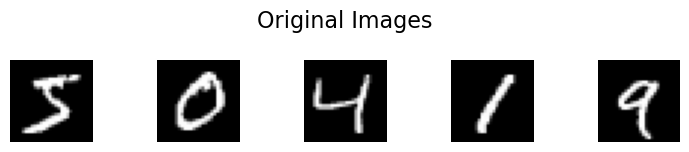

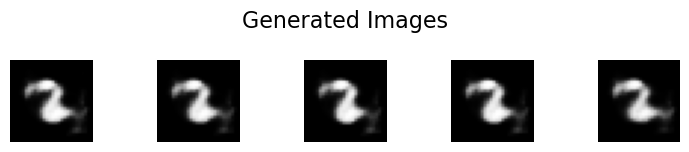

In [15]:
def generate_new_images(decoder, encoding_dim, n_images=10, noise_level=0.1):
    new_images = []
    for _ in range(n_images):
        random_encoded = np.random.normal(scale=noise_level, size=(1, encoding_dim))
        new_image = decoder.predict(random_encoded)
        new_images.append(new_image.reshape(28, 28))
    return np.array(new_images)

generated_images = generate_new_images(decoder, 2)

plot_images(data, title='Original Images', n_rows=1, n_cols=5)
plot_images(generated_images, title='Generated Images', n_rows=1, n_cols=5)

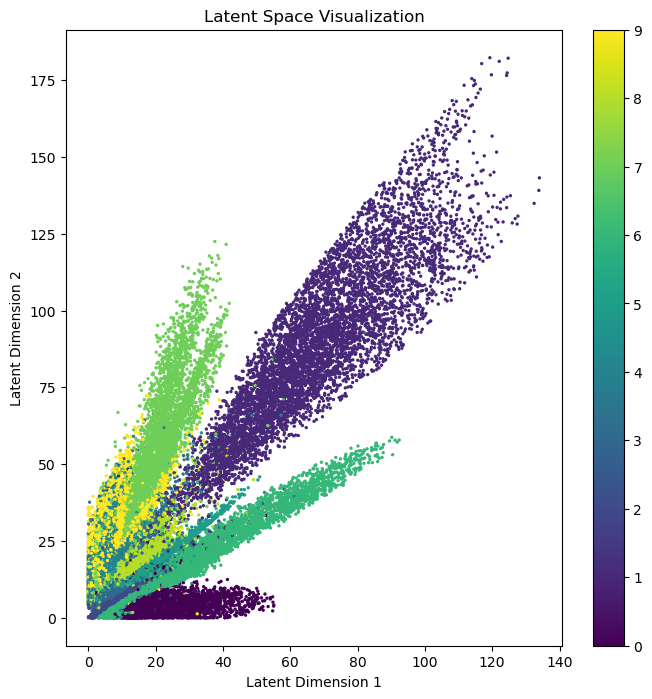

In [16]:
(X_train, y_train), (_, _) = mnist.load_data()
y_train = y_train[:compressed_data.shape[0]]
plot_latent_space(compressed_data, y_train)